In [1]:
from GoogleNews import GoogleNews
import pandas as pd
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import *

In [2]:
# function for incrementing date
def date_inc(start, period):
    dt1 = datetime.strptime(start, "%m/%d/%Y")
    dt2 = dt1 + timedelta(days=1)
    datetime.strftime(dt2, "%m/%d/%Y")
    date2 = dt2.strftime("%m/%d/%Y")
    return date2

In [3]:
# function for calculating lambda
def plot_freq(df):
  fig = plt.figure(figsize = (10,7))
  ax = fig.gca()
  df['date'].hist(ax = ax)

In [4]:
# search critia
search = 'AMZN'
start = '01/01/2020'
end = '01/01/2021'

In [5]:
# search for news in period from start 
googlenews = GoogleNews(start=start,end=end)
googlenews.search(search)
# pull the first 20 pages of the search and put data into df
for i in range(2,50):
  googlenews.getpage(i)
  result=googlenews.result()
  df=pd.DataFrame(result)

'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' obj

In [6]:
df['date'] = df['datetime'].dt.date
count = df['date'].value_counts() 
average = count.mean()
average

1.3166666666666667

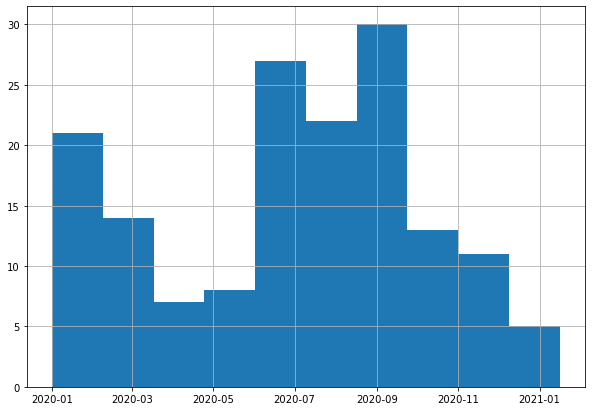

In [7]:
plot_freq(df)

<AxesSubplot:>

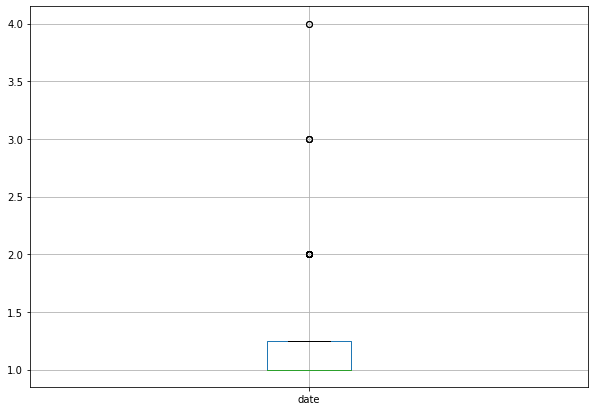

In [8]:
# find abnomal
countdf = count.to_frame()
countdf.boxplot(figsize = (10,7))

In [9]:
# find IQR
Q1 = np.percentile(countdf, 25)
Q3 = np.percentile(countdf, 75)
IQR = Q3-Q1
Q1,Q3

(1.0, 1.25)

In [10]:
# download stock data for amzn
import yfinance as yf
data = yf.download(search, start='2020-01-01', end='2021-01-01', interval = '1d')
data

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- APPL: No data found for this date range, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


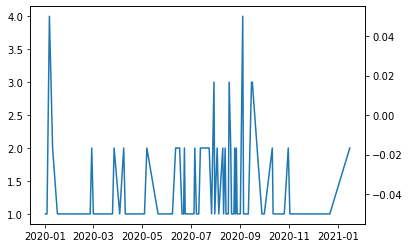

In [11]:
countdf['stock'] = data['Close']

plt.figure()
ax = countdf['date'].plot()
ax = countdf['stock'].plot(secondary_y = True)

In [12]:
countdf.sort_index()
countdf

,date,stock
2020-09-04,4,NaN
2020-01-06,4,NaN
2020-09-16,3,NaN
2020-09-15,3,NaN
2020-07-30,3,NaN
...,...,...
2020-01-18,1,NaN
2020-12-02,1,NaN
2020-02-05,1,NaN
2020-08-17,1,NaN
